In [1]:
# Load and analyse a log file from the `getting` HTTP load generator.
LOG_FILE_PATH = "../logs/got.txt"

In [2]:
from got import Got,Response
got = Got(LOG_FILE_PATH)

In [3]:
print(got.times())

[0.0, 327264256.0, 327395328.0, 356666624.0, 367113728.0, 380709888.0, 392210688.0, 402310656.0, 459612416.0, 496785152.0, 509246720.0, 550262016.0, 587176448.0, 645275136.0, 657875200.0, 732550400.0, 743664128.0, 780220416.0, 837434880.0, 861447936.0, 887344384.0, 958875648.0, 969671424.0, 995146240.0, 1032385280.0, 1068254208.0, 1143875584.0, 1157294848.0, 1195157760.0, 1220951040.0, 1291054080.0, 1301843968.0, 1327092736.0, 1364396032.0, 1402154752.0, 1478575360.0, 1489331200.0, 1525987072.0, 1551892992.0, 1590091520.0, 1644389120.0, 1684050176.0, 1719965184.0, 1756953856.0, 1807836672.0, 1822640640.0, 1860099072.0, 1897385216.0, 1923203328.0, 1958984704.0, 1996225024.0, 2055478528.0, 2078763008.0, 2121810176.0, 2145720832.0, 2186951680.0, 2242423040.0, 2255936512.0, 2292432896.0, 2366522112.0, 2377572096.0, 2413790208.0, 2439075840.0, 2491875840.0, 2517512960.0, 2588581632.0, 2599240448.0, 2624734208.0, 2662362624.0, 2697990400.0, 2773293056.0, 2786895872.0, 2823735040.0, 284763110

In [4]:
proportion = got.num_ok() / len(got)
print(proportion)

0.6093153237074989


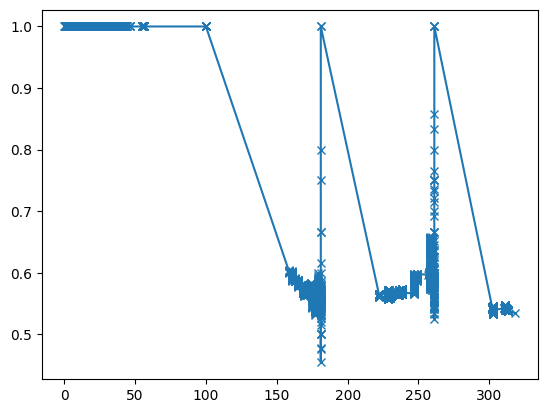

In [5]:
import matplotlib.pyplot as plt
def success_rate(window: list[Response]) -> float:
    count = list(map(lambda x: x.success, window)).count(True) 
    # print(count)
    return float(count) / float(len(window))
win_times, succ_rates = got.rolling(40.0,success_rate)
plt.plot(win_times, succ_rates,marker='x')